# Data models for Amazon Neptune using gen AI and diagram-as-code tools

## Introduction

In this notebook, we'll be using [PlantUML](https://plantuml.com/) to design and represent our graph data models. PlantUML is an open-source tooling that lets you create diagrams from plain text language. Although there is a wide variety of other tooling that can be used for graph data modeling, we are using PlantUML here because it will let us quickly design and iterate on a graph data model, with help from a Large Language Model (LLM). Because PlantUML is described with plain text, our LLM is able to generate models for us by providing the PlantUML directly when prompted. This provides benefits such as:
- *Reducing the barrier of entry to getting started with graphs* - No specialized graph tools or skills are needed
- *LLM-driven models are likely to follow established industry patterns* - LLMs have been trained on and thus have knowledge of how others within the same use case domain are modeling their graphs
- *Quicker discovery and iteration of graph data models* - Use LLMs to quickly create sample data and sample queries to validate the completeness of your proposed graph data model

The high-level architecture looks like this:

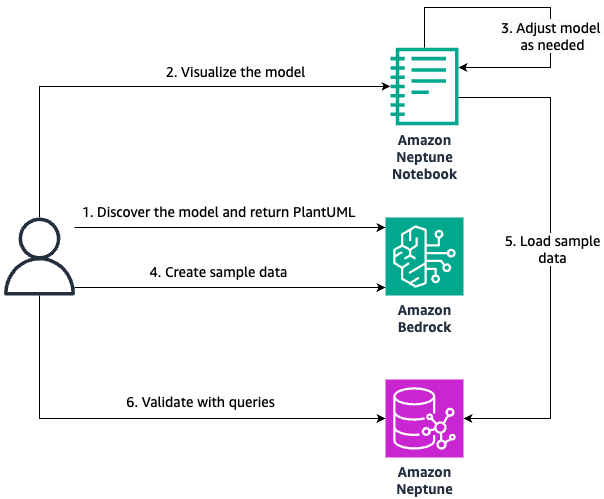

In this notebook, you'll be running each of the steps listed:

1. [*Model discovery*](#Step-1:-Discover-the-model-and-return-PlantUML) - Use the LLM to generate an initial graph data model for a given use case, in PlantUML
2. [*Model visualization*](#Step-2:-Visualize-the-model) - Use the PlantUML cell magic package to visualize the returned PlantUML within the notebooks
3. [*Model adjustment*](#Step-3:-Adjust-the-model) - Adjust the model using the LLM (or manually) to ensure it can answer the initial use case questions
4. [*Create and load sample data*](#Step-4:-Create-sample-data) - Use the LLM to generate sample data that aligns with the initial graph data model
5. [*Validate with queries*](#Step-5:-Query) - Use the LLM to generate sample queries to validate the initial use case questions
6. [*Assess the graph data model for further optimizations*](#Step-6:-Validate-best-practices-for-graph-data-modeling) - Use graph data modeling best practices to determine if there are any further optimizations that can be made to the graph data model



You can find a reference to the PlantUML syntax [here](https://pdf.plantuml.net/PlantUML_Language_Reference_Guide_en.pdf). 

To run through this notebook, you will need to have pre-created an Amazon Neptune Database cluster. If you don't have one already, refer to the instructions [here](https://docs.aws.amazon.com/neptune/latest/userguide/get-started-create-cluster.html) to set one up. Additionally, you should already have a [Neptune Notebook](https://docs.aws.amazon.com/neptune/latest/userguide/graph-notebooks.html) set up with this example notebook uploaded into it. Ensure that your Neptune Notebook has network connectivity to your Neptune Database cluster. You can validate this using the [Amazon VPC Reachability Analyzer](https://docs.aws.amazon.com/vpc/latest/reachability/what-is-reachability-analyzer.html).

<div class="alert alert-warning">
<strong>⚠️ Why are we using Neptune Database?</strong><hr>
With <a href="https://docs.aws.amazon.com/neptune/latest/userguide/intro.html">Neptune Database</a>, you can scale your graphs with more than 100,000 queries per second for the most demanding applications using a serverless graph database designed for superior scalability and availability. With <a href="https://docs.aws.amazon.com/neptune-analytics/latest/userguide/what-is-neptune-analytics.html">Neptune Analytics</a>, you can get insights and find trends by quickly processing large amounts of graph data, invoking popular graph analytic algorithms in low latency queries, and getting analytics results in seconds.
    
Since we won't require running graph algorithms or vector search for our example, we use Neptune Database. However, this same architecture works with Neptune Analytics as well if you wish to use Neptune Analytics instead.
</div>

## Step 1: Discover the model and return PlantUML

You are the owner of AnyCompany, a travel agency that helps people find nonstop and multi-stop flights around the world. The first version of your application should be able to:
- Find possible flight routes from one airport to another, based on the existence of flights between airports
- Sort flight routes (nonstop and multi-stop) according to total distance

Using [Amazon Bedrock](https://aws.amazon.com/bedrock/), generate an initial graph data model to answer the given use case. Here is an example prompt that you can use.

Prompt:
> *Create a graph data model to model flights between airports. The graph data model should allow an application to find possible flight routes from one airport to another. It should also allow an application to sort flights (both nonstop and multi-stop) according to total distance. Show the model as a PlantUML class diagram.*


You can use the [Chat playground](https://docs.aws.amazon.com/bedrock/latest/userguide/playgrounds.html) in the Amazon Bedrock console. We've received great results using Anthropic's Claude 3 Sonnet and Claude 3.5 Sonnet models. Feel free to try other models. Alternatively, you can interact directly with the LLM through the [Jupyter AI magics](https://github.com/jupyterlab/jupyter-ai). To get started, install the extension:

In [ ]:
!pip install jupyter_ai_magics -q

Load the extension:

In [ ]:
%load_ext jupyter_ai_magics

Then submit your prompt through the `%%ai` magic like so:

In [ ]:
%%ai bedrock:anthropic.claude-v2 -m {"model_kwargs":{}} -f code

<YOUR PROMPT>

<div class="alert alert-warning">
<strong>⚠️ Seeing permissions issue?</strong><hr>
    
If you're receiving a <code>AccessDeniedException</code>, ensure that you have enabled model access for the models that you are using. More details on this can be found in the documentation <a href="https://docs.aws.amazon.com/bedrock/latest/userguide/model-access-modify.html">here</a>.
</div>

## Step 2: Visualize the model



### Install the PlantUML cell magic package
Before we visualize the returned model, we need to install the [plugin](https://pypi.org/project/IPlantUML/) that will let us generate PlantUML visualizations within the notebook. 

In [ ]:
!pip install iplantuml -q

In [ ]:
import iplantuml

### Visualize the PlantUML
Now you can copy and paste the PlantUML received from the LLM into the cell below. The `%%plantuml` magic will generate a visualization.

In [ ]:
%%plantuml

@startuml

<YOUR PLANTUML>

@enduml

<div class="alert alert-warning">
<strong>⚠️ Visualization not being generated?</strong><hr>
    
If you're encountering errors with generating the visualization, ensure that the PlantUML is valid. You can use a tool like <a href="https://www.planttext.com/">PlantText</a> to help validate the syntax.
</div>

<div class="alert alert-block alert-info"> 
<details>
    <summary>➡️&nbsp <b>Need a first iteration of a PlantUML sample? Click here!</b></summary><br>
    Sometimes the LLM-generated PlantUML isn't syntactically correct, or the returned model might be completely off base. Here is a syntactically correct model that can be used as a starting point.
    
```plantuml
@startuml

class Airport {
  -code: String
  -name: String
  -city: String
  -country: String
  -latitude: double
  -longitude: double
}

class Flight {
  -flightNumber: String
  -airline: String
  -departureTime: DateTime
  -arrivalTime: DateTime
  -distance: double
}

Airport "1" --> "0..*" Flight : departureAirport
Airport "1" --> "0..*" Flight : arrivalAirport

@enduml    
```
    
</details>
</div>

## Step 3: Adjust the model


Given the initial model given by the LLM and our specific use case requirements, consider the following:
- Are we missing any entity/relationship types to answer our use case?
- Are we missing any properties to answer our use case?
- Should we change the direction of any edges?
- Are there any extraneous entity/relationship types that we can remove?

Use the LLM to make any desired changes, or make the changes manually. You can refer to this [PlantUML Language Reference Guide](https://pdf.plantuml.net/PlantUML_Language_Reference_Guide_en.pdf) for details on syntax.


In [ ]:
%%plantuml

@startuml

<YOUR PLANTUML>

@enduml

<div class="alert alert-block alert-info"> 
<details>
    <summary>➡️&nbsp <b>Need a second iteration of a PlantUML sample? Click here!</b></summary><br>
    The following is our second iteration, based off the initial sample first iteration provided in Step 2. We added directionality to the edges to make it clear that <code>Flights</code> will connect <i>to</i> <code>Airports</code>. We also prefixed the edge labels with <i>has</i> to further clarify the direction of the edges. This can be read as <code>Flight</code> <i>hasDepartureAirport</i> <code>Airport</code>, and <code>Flight</code> <i>hasArrivalAirport</i> <code>Airport</code>.
    
```plantuml
@startuml

class Airport {
  -code: String
  -name: String
  -city: String
  -country: String
  -latitude: double
  -longitude: double
}

class Flight {
  -flightNumber: String
  -airline: String
  -departureTime: DateTime
  -arrivalTime: DateTime
  -distance: double
}

Airport "1" <-- "0..*" Flight : hasDepartureAirport
Airport "1" <-- "0..*" Flight : hasArrivalAirport

@enduml    
```
    
</details>
</div>

## Step 4: Create sample data

Using [Amazon Bedrock](https://aws.amazon.com/bedrock/), generate sample data that matches the input graph data model. Here is an example prompt that you can use.

Prompt:
> *Generate openCypher queries to create sample data based on the following PlantUML class diagram:*
>
>*```plantuml*
>
> *&lt;PlantUML&gt;*
>
>*```*
>
> *All openCypher statements should be provided in a single code block. Always use the datetime() function instead of the date() function. The parameter of the datetime() function should be in the format of YYYY-MM-DDTHH. Include a ``WITH 1 AS X`` statement between CREATE and MATCH statements. For example, instead of ``CREATE (:user {name:‘Melissa’}) MATCH (u1 {name:‘Melissa’}) CREATE (u1)-[:knows]->({name:‘Kelvin’})``, write it as ``CREATE (:user {name:‘Melissa’}) WITH 1 AS X MATCH (u1 {name:‘Melissa’}) CREATE (u1)-[:knows]->({name:‘Kelvin’})``. Do not separate statements with a semicolon (;). Create at least 10 different airports, and include at least 10 connecting flights between the 10 different airports. Do not provide any explanation for your answer.*

Again, you can use the [Chat playground](https://docs.aws.amazon.com/bedrock/latest/userguide/playgrounds.html) in the Amazon Bedrock console. We've received great results using Anthropic's Claude 3 Sonnet and Claude 3.5 Sonnet models. Feel free to try other models. Alternatively, you can interact directly with the LLM through the [Jupyter AI magics](https://github.com/jupyterlab/jupyter-ai) mentioned in Step 1. 


<div class="alert alert-warning">
<strong>⚠️ Why are we using openCypher?</strong><hr>
Amazon Neptune Database supports both the Resource Description Framework (RDF) as well as the Labeled Property Graph (LPG) framework. Subsequently it supports <a href="https://docs.aws.amazon.com/neptune/latest/userguide/access-graph-sparql.html">SPARQL for querying RDF</a> and <a href="https://docs.aws.amazon.com/neptune/latest/userguide/access-graph-opencypher.html">openCypher</a> and <a href="https://docs.aws.amazon.com/neptune/latest/userguide/access-graph-gremlin.html">Gremlin</a> for querying LPG. For this example, we've chosen to model the use case using LPG as the types of queries that we require to answer our use case are most easily represented and written with an LPG query language. When working with a different use case, you may consider using a different framework. Or perhaps you may even consider testing both frameworks - by using LLMs, this is easy to do! 
</div>


Before running your queries, make sure that your notebook has been configured to write and read to and from the correct Neptune Database cluster. You can verify this using the `%%graph_notebook_config` magic, as described [here](https://docs.aws.amazon.com/neptune/latest/userguide/notebooks-magics.html#notebooks-line-magics-graph-notebook-config).

In [ ]:
%%oc

<YOUR QUERY HERE>

<div class="alert alert-block alert-info"> 
<details>
    <summary>➡️&nbsp <b>Need an openCypher sample? Click here!</b></summary><br>
    The following is an openCypher query that will create sample data that matches our second iteration of the graph data model in Step 3.
    
```cypher
CREATE (:Airport {code: 'JFK', name: 'John F. Kennedy International Airport', city: 'New York', country: 'USA', latitude: 40.6413, longitude: -73.7781})
CREATE (:Airport {code: 'LAX', name: 'Los Angeles International Airport', city: 'Los Angeles', country: 'USA', latitude: 33.9416, longitude: -118.4085})
CREATE (:Airport {code: 'LHR', name: 'London Heathrow Airport', city: 'London', country: 'UK', latitude: 51.4700, longitude: -0.4543})
CREATE (:Airport {code: 'CDG', name: 'Charles de Gaulle Airport', city: 'Paris', country: 'France', latitude: 49.0097, longitude: 2.5479})
CREATE (:Airport {code: 'HND', name: 'Tokyo Haneda Airport', city: 'Tokyo', country: 'Japan', latitude: 35.5533, longitude: 139.7811})
CREATE (:Airport {code: 'DXB', name: 'Dubai International Airport', city: 'Dubai', country: 'UAE', latitude: 25.2532, longitude: 55.3657})
CREATE (:Airport {code: 'SIN', name: 'Singapore Changi Airport', city: 'Singapore', country: 'Singapore', latitude: 1.3644, longitude: 103.9915})
CREATE (:Airport {code: 'FRA', name: 'Frankfurt Airport', city: 'Frankfurt', country: 'Germany', latitude: 50.0379, longitude: 8.5622})
CREATE (:Airport {code: 'SYD', name: 'Sydney Airport', city: 'Sydney', country: 'Australia', latitude: -33.9399, longitude: 151.1753})
CREATE (:Airport {code: 'YYZ', name: 'Toronto Pearson International Airport', city: 'Toronto', country: 'Canada', latitude: 43.6777, longitude: -79.6248})
WITH 1 AS X
MATCH (a:Airport {code: 'JFK'}), (b:Airport {code: 'LAX'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'AA100', airline: 'American Airlines', departureTime: datetime('2023-05-01T08:00'), arrivalTime: datetime('2023-05-01T11:00'), distance: 3935})-[:hasArrivalAirport]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'LHR'}), (b:Airport {code: 'CDG'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'BA300', airline: 'British Airways', departureTime: datetime('2023-05-01T09:30'), arrivalTime: datetime('2023-05-01T11:45'), distance: 344})-[:hasArrivalAirport]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'HND'}), (b:Airport {code: 'SIN'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'JL750', airline: 'Japan Airlines', departureTime: datetime('2023-05-01T10:15'), arrivalTime: datetime('2023-05-01T16:45'), distance: 3324})-[:hasArrivalAirport]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'DXB'}), (b:Airport {code: 'FRA'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'EK45', airline: 'Emirates', departureTime: datetime('2023-05-01T01:30'), arrivalTime: datetime('2023-05-01T06:00'), distance: 3011})-[:hasArrivalAirport]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'SYD'}), (b:Airport {code: 'LAX'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'QF11', airline: 'Qantas', departureTime: datetime('2023-05-01T09:50'), arrivalTime: datetime('2023-05-01T06:30'), distance: 7487})-[:hasArrivalAirport]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'YYZ'}), (b:Airport {code: 'LHR'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'AC856', airline: 'Air Canada', departureTime: datetime('2023-05-01T22:55'), arrivalTime: datetime('2023-05-02T10:25'), distance: 5711})-[:hasArrivalAirport]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'CDG'}), (b:Airport {code: 'JFK'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'AF22', airline: 'Air France', departureTime: datetime('2023-05-01T13:30'), arrivalTime: datetime('2023-05-01T15:50'), distance: 5841})-[:hasArrivalAirport]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'FRA'}), (b:Airport {code: 'SIN'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'LH778', airline: 'Lufthansa', departureTime: datetime('2023-05-01T21:55'), arrivalTime: datetime('2023-05-02T16:05'), distance: 6391})-[:hasArrivalAirport]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'SIN'}), (b:Airport {code: 'SYD'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'SQ221', airline: 'Singapore Airlines', departureTime: datetime('2023-05-01T20:10'), arrivalTime: datetime('2023-05-02T05:55'), distance: 3907})-[:hasArrivalAirport]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'LAX'}), (b:Airport {code: 'YYZ'})
CREATE (a)<-[:hasDepartureAirport]-(:Flight {flightNumber: 'WS1100', airline: 'WestJet', departureTime: datetime('2023-05-01T23:59'), arrivalTime: datetime('2023-05-02T07:27'), distance: 3507})-[:hasArrivalAirport]->(b) 
```
    
</details>
</div>

### Visualize the sample data in the graph

Before we generate a visualization, we can modify how the nodes and edges will be annotated. The following cell will define which property values will be annotated on which node and edge types. For example, the following cell will define that `Airport` type nodes will be annotated with the value of its `code` property, and `Flight` type nodes will be annotated with the value of its `distance` property.

In [ ]:
node_labels = '{"Airport":"code","Flight":"distance"}'

We can now write a query to visualize the sample graph data that was added. To generate visualization in the notebooks, write a query to return a path. The following is an example query that will visualize the entire graph. You can learn more about returning paths in openCypher [here](https://s3.amazonaws.com/artifacts.opencypher.org/openCypher9.pdf), on page 12. 

In [ ]:
%%oc -d $node_labels -l 40

MATCH p = ()-[]->()
RETURN p

<div class="alert alert-warning">
<strong>⚠️ Warning</strong><hr>
The above query is fine for visualizing small graphs. For large graphs, we recommend adding a <code>LIMIT</code> or other filters to limit the amount of paths returned. Returning too many paths in a single visualization will clutter the canvas and slow down the browser. 
</div>


Alternatively, you can use the Gremlin query language to generate a visualization like so:

In [ ]:
%%gremlin -d $node_labels -l 40

g.V().bothE().otherV().path().by(elementMap())

## Step 5: Query

Now it's time to validate our graph data model. We need to translate the original use case questions into graph queries. For convenience, here are the original use case questions:

- Find possible flight routes from one airport to another, based on the existence of flights between airports
- Sort flight routes (nonstop and multi-stop) according to total distance

Once again, you can use the LLM to generate sample queries. Here is a sample prompt that you can use.

Prompt:
> *Generate an openCypher query to find flights that go from one Airport to another Airport, and return the total distance. The following PlantUML class diagram represents the graph data model being used:*
>
>*```plantuml*
>
> *&lt;PlantUML&gt;*
>
>*```*
>
> *When generating the query in openCypher, make sure to follow these rules:
> Do not use ``NONE``, ``ALL`` or ``ANY`` predicate functions, rather use list comprehensions.
> Do not use ``REDUCE`` function. Rather use a combination of list comprehension and the ``UNWIND`` clause to achieve similar results.
> Do not use ``FOREACH`` clause. Rather use a combination of ``WITH`` and ``UNWIND`` clauses to achieve similar results.*

You can also try asking the LLM to generate a Gremlin query instead/in addition to an openCypher query. Make sure to modify the prompt accordingly. 

In [ ]:
%%oc

<YOUR QUERY HERE>

<div class="alert alert-block alert-info"> 
<details>
    <summary>➡️&nbsp <b>Need sample queries? Click here!</b></summary><br>
    You may find that the query returned by the LLM is syntactically incorrect, and/or overly complex for the use case we're trying to answer. You can use the following openCypher and Gremlin queries to find flights from JFK to LAX and include the distance. These queries will work with the provided sample data that was provided in Step 4.
    
```cypher
MATCH p = ({code:'JFK'})<-[:hasDepartureAirport]-(f)-[:hasArrivalAirport]->({code:'LAX'})
WITH f, [airport IN nodes(p) WHERE airport:Airport | airport.code] AS path
RETURN path, f.distance AS distance
```
    
```gremlin
g.withSack(0).V().has('code','JFK')
 .repeat(in('hasDepartureAirport').sack(sum).by(values('distance')).out('hasArrivalAirport').simplePath())
 .until(has('code','LAX'))
 .project('path','distance')
 .by(path().unfold().hasLabel('Airport').values('code').fold())
 .by(sack())

```
    
</details>
</div>

## Step 6: Validate best practices for graph data modeling

In Step 5, we saw that our graph data model could answer our main use case - *Find possible flight routes from one airport to another, based on existence of flights between airports*. Since distance between airports is included in the graph data model, we can also *Sort flight routes (nonstop and multi-stop) according to total distance*, which was also part of our initial requirements.

But notice that our initial query above requires traversing a `Flight` node in order to find if a flight exists between a given pair of airports. For our initial use case, we ***only*** care about whether or not a flight exists between a given pair of airports, and what the distance is. Can we re-model our graph to be more efficient for querying? For example, should we...
- …re-model some nodes as properties or vice versa?
- …re-model some nodes as edges or vice versa?

Based on the above considerations, generate a new iteration of the graph data model. Feel free to use the LLM to help you make adjustments, or make the adjustments manually.

In [ ]:
%%plantuml

<YOUR PLANTUML>

<div class="alert alert-block alert-info"> 
<details>
    <summary>➡️&nbsp <b>Need a final iteration of a PlantUML sample? Click here!</b></summary><br>
 Since we only care about the existence of a route between a pair of airports, we can reduce the complexity of our graph data model by re-modeling <code>Flights</code> to be edges between <code>Airports</code>. We re-name the edge as <code>Route</code> instead of <code>Flight</code> to represent that at least one flight between the airports exists. Additionally, we store the common flight information (e.g. <code>distance</code>) as a property within the edge.
    
```plantuml
@startuml

class Airport {
  -code: String
  -name: String
  -city: String
  -country: String
  -latitude: double
  -longitude: double
}

Airport "0..*" <-- "1" Airport 
(Airport, Airport) .. Route

class Route {
  -distance: double
}

@enduml  
```
    
</details>
</div>

<div class="alert alert-success">
<strong>🧠  Looking for more material on graph data modeling?</strong><hr>
Refer to the <a href="https://explore.skillbuilder.aws/learn/course/external/view/elearning/16133/data-modeling-for-amazon-neptune">Data Modeling for Amazon Neptune</a> SkillBuilder course to learn best practices for graph data modeling on Amazon Neptune.
</div>


### Re-create sample data

Now that we have an updated model, use the LLM to regenerate new sample data that matches the updated model.

Prompt:
> *Generate openCypher queries to create sample data based on the following PlantUML class diagram:*
>
>*```plantuml*
>
> *&lt;PlantUML&gt;*
>
>*```*
>
> *In this PlantUML class diagram an association class is used to represent the edge properties that can exist on the edge with the label "Route". "Airport" nodes connect to other "Airport" nodes via the "Route" edge. All openCypher statements should be provided in a single code block. Always use the datetime() function instead of the date() function. The parameter of the datetime() function should be in the format of YYYY-MM-DDTHH. Include a ``WITH 1 AS X`` statement between CREATE and MATCH statements. For example, instead of ``CREATE (:user {name:‘Melissa’}) MATCH (u1 {name:‘Melissa’}) CREATE (u1)-[:knows]->({name:‘Kelvin’})``, write it as ``CREATE (:user {name:‘Melissa’}) WITH 1 AS X MATCH (u1 {name:‘Melissa’}) CREATE (u1)-[:knows]->({name:‘Kelvin’})``. Do not separate statements with a semicolon (;). Create at least 10 different airports, and include at least 10 connecting flights between the 10 different airports. Do not provide any explanation for your answer.*

Again, you can interact directly with the LLM through the Jupyter AI magics, or use the Chat playground in the Amazon Bedrock console: https://us-east-1.console.aws.amazon.com/bedrock/home?region=us-east-1#chat-playground

You can also try asking the LLM to generate a Gremlin query instead/in addition to an openCypher query. Make sure to modify the prompt accordingly. 

In [ ]:
%%oc

<YOUR OC QUERY>

<div class="alert alert-block alert-info"> 
<details>
    <summary>➡️&nbsp <b>Need an openCypher sample? Click here!</b></summary><br>
    The following is an openCypher query that will create sample data that matches our second iteration of the graph data model in Step 3.
    
```cypher
CREATE (:Airport {code: 'JFK', name: 'John F. Kennedy International Airport', city: 'New York', country: 'USA', latitude: 40.6413, longitude: -73.7781})
CREATE (:Airport {code: 'LAX', name: 'Los Angeles International Airport', city: 'Los Angeles', country: 'USA', latitude: 33.9416, longitude: -118.4085})
CREATE (:Airport {code: 'LHR', name: 'London Heathrow Airport', city: 'London', country: 'UK', latitude: 51.4700, longitude: -0.4543})
CREATE (:Airport {code: 'CDG', name: 'Charles de Gaulle Airport', city: 'Paris', country: 'France', latitude: 49.0097, longitude: 2.5479})
CREATE (:Airport {code: 'HND', name: 'Tokyo Haneda Airport', city: 'Tokyo', country: 'Japan', latitude: 35.5533, longitude: 139.7811})
CREATE (:Airport {code: 'DXB', name: 'Dubai International Airport', city: 'Dubai', country: 'UAE', latitude: 25.2532, longitude: 55.3657})
CREATE (:Airport {code: 'SIN', name: 'Singapore Changi Airport', city: 'Singapore', country: 'Singapore', latitude: 1.3644, longitude: 103.9915})
CREATE (:Airport {code: 'FRA', name: 'Frankfurt Airport', city: 'Frankfurt', country: 'Germany', latitude: 50.0379, longitude: 8.5622})
CREATE (:Airport {code: 'SYD', name: 'Sydney Airport', city: 'Sydney', country: 'Australia', latitude: -33.9399, longitude: 151.1753})
CREATE (:Airport {code: 'YYZ', name: 'Toronto Pearson International Airport', city: 'Toronto', country: 'Canada', latitude: 43.6777, longitude: -79.6248})
WITH 1 AS X
MATCH (a:Airport {code: 'JFK'}), (b:Airport {code: 'LAX'})
CREATE (a)-[:Route {distance: 3935}]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'LHR'}), (b:Airport {code: 'CDG'})
CREATE (a)-[:Route {distance: 344}]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'HND'}), (b:Airport {code: 'SIN'})
CREATE (a)-[:Route {distance: 3324}]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'DXB'}), (b:Airport {code: 'FRA'})
CREATE (a)-[:Route {distance: 3011}]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'SYD'}), (b:Airport {code: 'LAX'})
CREATE (a)-[:Route {distance: 7487}]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'YYZ'}), (b:Airport {code: 'LHR'})
CREATE (a)-[:Route {distance: 5711}]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'CDG'}), (b:Airport {code: 'JFK'})
CREATE (a)-[:Route {distance: 5841}]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'FRA'}), (b:Airport {code: 'SIN'})
CREATE (a)-[:Route {distance: 6391}]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'SIN'}), (b:Airport {code: 'SYD'})
CREATE (a)-[:Route {distance: 3907}]->(b)
WITH 1 AS X
MATCH (a:Airport {code: 'LAX'}), (b:Airport {code: 'YYZ'})
CREATE (a)-[:Route {distance: 3507}]->(b)
```
    
</details>
</div>

### Re-query the sample data

And once again, use the LLM to generate sample queries. Here is a sample prompt that you can use.

Prompt:
> *Generate an openCypher query to find flights that go from one Airport to another Airport, and return the total distance. The following PlantUML class diagram represents the graph data model being used:*
>
>*```plantuml*
>
> *&lt;PlantUML&gt;*
>
>*```*
>
> *When generating the query in openCypher, make sure to follow these rules:
> Do not use ``NONE``, ``ALL`` or ``ANY`` predicate functions, rather use list comprehensions.
> Do not use ``REDUCE`` function. Rather use a combination of list comprehension and the ``UNWIND`` clause to achieve similar results.
> Do not use ``FOREACH`` clause. Rather use a combination of ``WITH`` and ``UNWIND`` clauses to achieve similar results.*


In [ ]:
%%oc

<YOUR OC QUERY>

<div class="alert alert-block alert-info"> 
<details>
    <summary>➡️&nbsp <b>Need sample queries? Click here!</b></summary><br>
    You may find that the query returned by the LLM is syntactically incorrect, and/or overly complex for the use case we're trying to answer. You can use the following openCypher and Gremlin queries to find flights from JFK to LAX and include the distance. These queries will work with the provided sample data that was provided in Step 6.
    
```cypher
MATCH p = ({code:'JFK'})-[r:Route]->({code:'LAX'})
WITH [airport IN nodes(p) WHERE airport:Airport | airport.code] AS path, r
RETURN path, r.distance AS distance
```
    
```gremlin
g.withSack(0).V().has('code','JFK')
 .repeat(outE('Route').sack(sum).by('distance').inV().simplePath())
 .until(has('code','LAX'))
 .project('path','distance')
 .by(path().unfold().hasLabel('Airport').values('code').fold())
 .by(sack())

```
    
You may notice that the structure of the queries is very similar to the queries used in Step 5. However, with the model change made, we are traversing one less node and edge. This may seem like a trivial performance improvement for the queries we've been doing, but the improvement can become significant once you start doing deeper and/or more complex traversals. 
    
Feel free to experiment with deeper traversals and compare the performance using the <a href="https://docs.aws.amazon.com/neptune/latest/userguide/access-graph-opencypher-explain.html">openCypher explain plans</a> and/or the <a href="https://docs.aws.amazon.com/neptune/latest/userguide/gremlin-profile-api.html">Gremlin profiles</a>.
    
</details>
</div>

## Bonus challenge: What if our use case changes?

In addition to the initial application requirements, let's say that we should now also be able to: 
- Find flight routes from one airport to another for a *particular date and time*. Multi-stop flights should include the option of customizing a minimum and maximum amount of layover time at each intermediary airport. 
- Flight routes may sometimes change destinations based on weather, availability, etc. The model should accommodate for these potential changes.

Assume that flights can only be booked up to 1 year (365 days) in advance.

Prompt:
> *Create a graph data model to model flights between airports. The graph data model should allow an application to find possible flight routes from one airport to another for a particular date and time. Multi-stop flights should include the option of customizing a minimum and maximum amount of layover time at each intermediary airport. Flight routes may sometimes change destinations based on weather, availability, etc. The model should accommodate for these potential changes. The model should also allow an application to sort flights (both nonstop and multi-stop) according to total distance. Show the model as a PlantUML class diagram.*

In [ ]:
%%plantuml

@startuml

<YOUR PLANTUML>

@enduml

<div class="alert alert-block alert-info"> 
<details>
    <summary>➡️&nbsp <b>Need a PlantUML sample? Click here!</b></summary><br>   
    
```plantuml
@startuml

class AirportDay {
  -code: String
  -date: datetime
}

class Route {
  -departure: datetime
  -arrival: datetime
  -distance: double
}

class Airport {
  -code: String
  -city: String
  -country: String
  -latitude: double
  -longitude: double
  -name: String
}


AirportDay "1" --> "0..*" Airport : hasDestination
Airport "1" --> "0..*" Route : hasRoute
Route "1" --> "1" AirportDay : hasRoute

@enduml  
```

    
Notice that this model looks similar to the very first model that we came up with, where flights (AKA routes) are represented as nodes. Since our initial use case only required knowing <b><i>if</b></i> a route existed between a given pair of airports, it was more efficient to represent them as edges instead of nodes. Now that we need to consider both flight dates and times to determine a possible route, we should model routes as its own node. This will given us the flexibility to associate other entities (in this case, other airports) with a route, and it will make it easier to query for specific routes that need to occur within a certain date/time frame.
    
    
</details>
</div>

## Conclusion

You have now learned how to use LLMs to go from initial graph data model discovery all the way to validation and optimization of the graph data model! You might be wondering where you would go next after you come up with your first iteration of an optimized graph data model. We would recommend:

- *ETL a sample of your actual data to match the graph data model.* The sample graph data that is generated by the LLM is great for validating your use case in straightforward situations, but your actual data is likely to have different cardinalities and shape than the sample data which can affect query performance and optimizations. ETLing a sample of your actual data will help you quickly validate the model's effectivness. Test your graph queries against the sample of your actual data. 
- *ETL the remaininder of your actual datato match the graph data model.* Test your graph queries against the entirety of your actual data. Compare it to the performance of the queries that ran on the sample of your actual data. A good graph data model should be able to see performance scale well as the volume of the graph increases. 
- *Adjust the queries and/or model to match the scale and performance as required by your use case.* 

### Additional resources

Looking for more resources on the topics we just covered? If so, we also recommend you check out the following:

- AWS Blog on [Diagram-as-code using generative AI to build a data model for Amazon Neptune](https://aws.amazon.com/blogs/database/diagram-as-code-using-generative-ai-to-build-a-data-model-for-amazon-neptune/)
- AWS SKillBuilder course for [Data Modeling for Amazon Neptune](https://explore.skillbuilder.aws/learn/course/external/view/elearning/16133/data-modeling-for-amazon-neptune)
- AWS Blog on [Discover and visualize graph schemas in Amazon Neptune](https://aws.amazon.com/blogs/database/discover-and-visualize-graph-schemas-in-amazon-neptune/)
- AWS Blog on [Knowledge Graphs and Generative AI (GraphRAG) with Amazon Neptune and LlamaIndex](https://community.aws/content/2kOWDPgScaWwILcSgQfRVpfbTYa/knowledge-graphs-and-generative-ai-graphrag-with-amazon-neptune-and-llamaindex-part-1-natural-language-querying?lang=en)